# Data Science Internship Project - CodeSoft
##    Task 4 : Sales Prediction using Python

## 1. Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 2. Loading the Dataset

In [81]:
Sales_file_path = "C:/Users/hp/Downloads/advertising.csv" 
df = pd.read_csv(Sales_file_path)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [82]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [83]:
df.shape

(200, 4)

## 3. Data Cleaning and Preprocessing 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

In [87]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


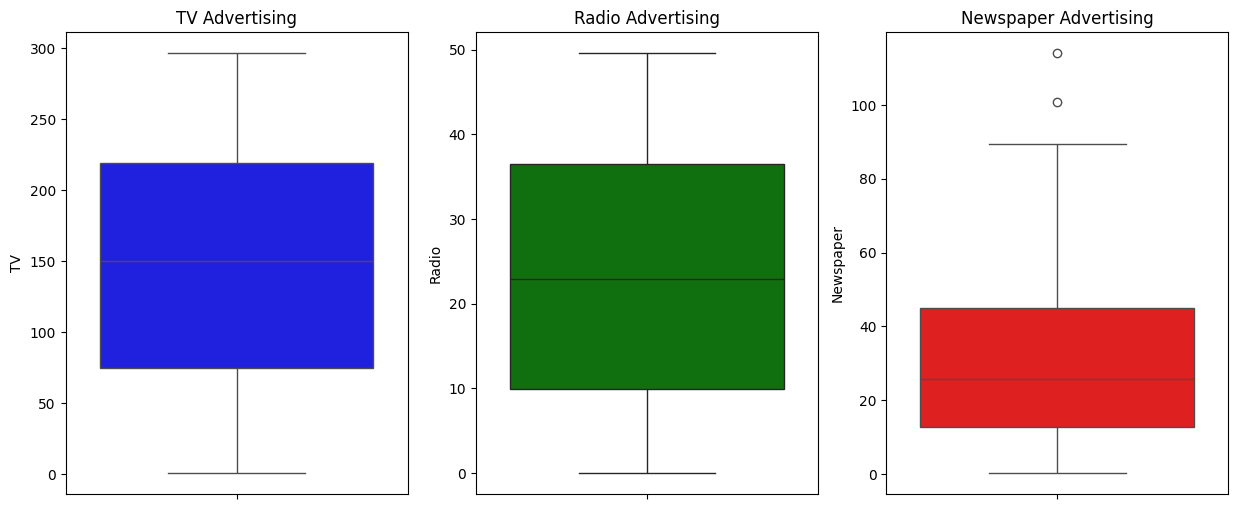

In [88]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['TV'], color='blue')
plt.title('TV Advertising')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Radio'], color='green')
plt.title('Radio Advertising')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Newspaper'], color='red')
plt.title('Newspaper Advertising')

plt.show()

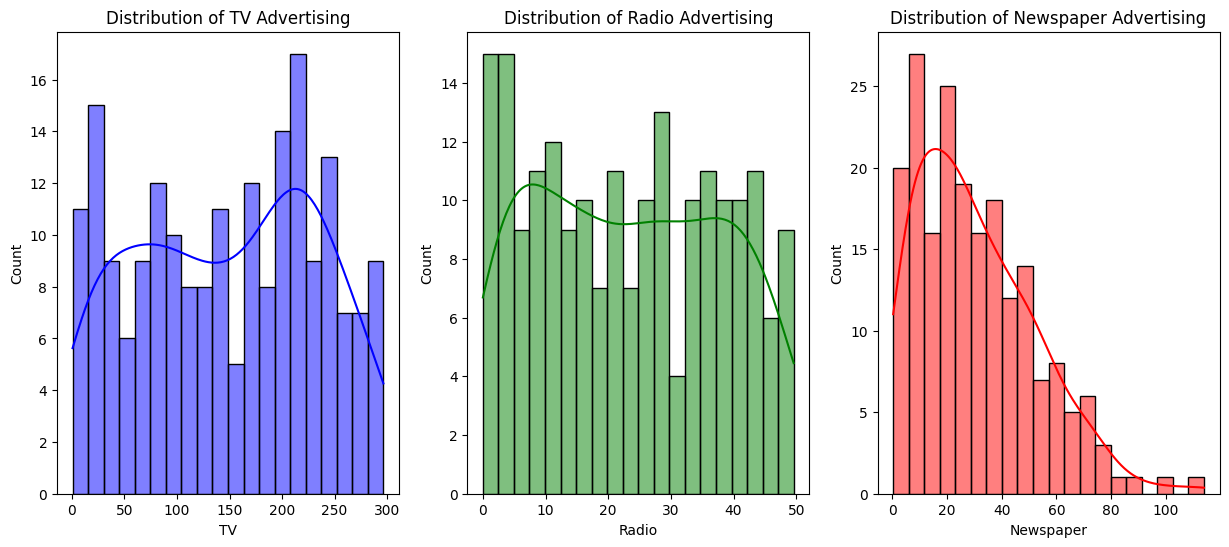

In [89]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['TV'], bins=20, kde=True, color='blue')
plt.title('Distribution of TV Advertising')

plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], bins=20, kde=True, color='green')
plt.title('Distribution of Radio Advertising')

plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], bins=20, kde=True, color='red')
plt.title('Distribution of Newspaper Advertising')

plt.show()

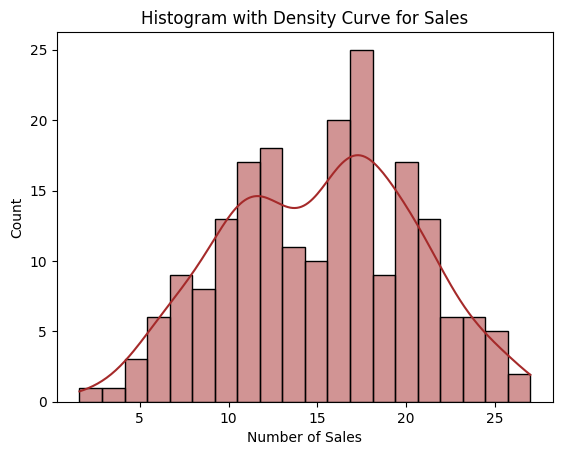

In [90]:
fig,ax=plt.subplots()
sns.histplot(df['Sales'],bins=20,color='brown', kde=True)
ax.set_xlabel('Number of Sales')
ax.set_title('Histogram with Density Curve for Sales')
plt.show()

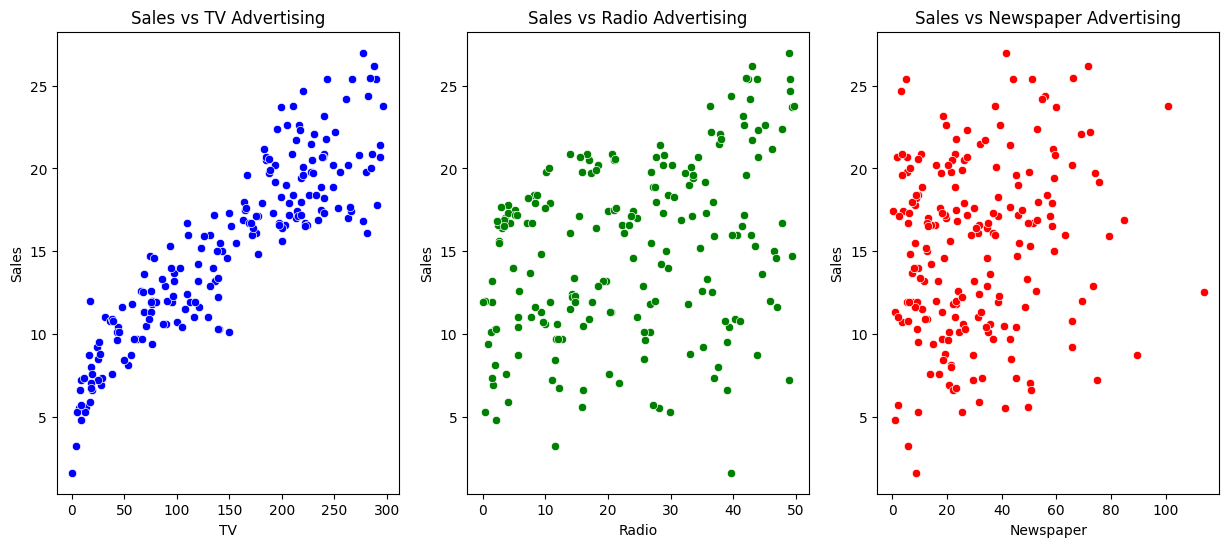

In [91]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
plt.title('Sales vs TV Advertising')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df, color='green')
plt.title('Sales vs Radio Advertising')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='red')
plt.title('Sales vs Newspaper Advertising')

plt.show()

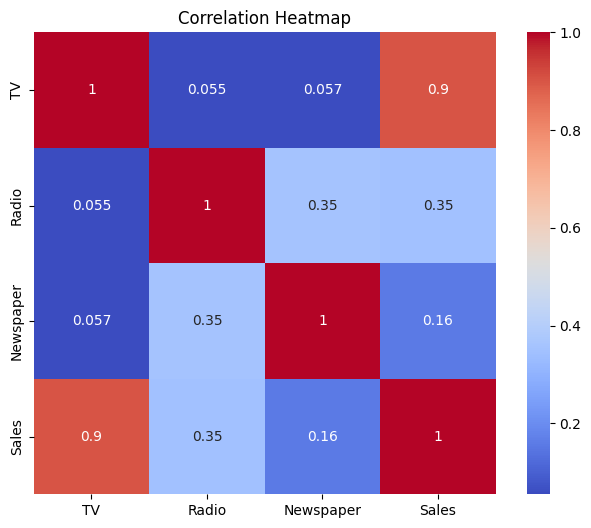

In [92]:
correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## 5. Defining Features and Target

In [93]:
y = df.Sales  # Target variable 
Sales_features = ['TV', 'Radio','Newspaper']  # Features to be used for model
X = df[Sales_features]  # Features data

## 6. Data Splitting

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Building

In [95]:
# Initializing the Linear Regression model
Sales_model = LinearRegression()

In [96]:
# Fitting the model to the training data
Sales_model.fit(X_train, y_train)

LinearRegression()

## 8. Model Evaluation

In [78]:
y_pred_test = Sales_model.predict(X_test)

In [98]:
# Evaluating the model's performance
MSE =  mean_squared_error(y_test, y_pred_test) 
MAE = mean_absolute_error(y_test, y_pred_test)
R2_Score = r2_score(y_test, y_pred_test)

print('Mean squared error value is: ', MSE)
print('Mean absolute error value is: ', MAE)
print('R2 score value is: ', R2_Score)

Mean squared error value is:  2.9077569102710896
Mean absolute error value is:  1.2748262109549338
R2 score value is:  0.9059011844150826
